# HW3#2

# Function to Import train data and do pre-processing

In [42]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
#import pydotplus
from IPython.display import Image
from sklearn import metrics
%matplotlib inline



def data_processing(file):
    train=file.readlines()

    train_list=[]

    for line in train:
        line_replace=line.replace('?','mode')
        line_list=line_replace.split(",")
        #line_list=line_list.split(" ")
        for i in range(len(line_list)):
            if line_list[i].isdigit()==True:
                line_list[i]=int(line_list[i])
            
        train_list.append(line_list)
    train_list.pop()
    train_array=np.array(train_list)

    classVotes={}
    for i in range(len(train_list[0])):
        if type(train_list[0][i])==int:
            data=train_array[:,i]
            s=0
            num=1
            for j in data:
                s+=int(j)
                num+=1  
        classVotes[i]=s/num
    for i in range(len(train_list[0])):
        if type(train_list[0][i])==int:
            for j in range(len(train_list)):
                if train_list[j][i]=='mode':
                    train_list[j][i].replace('classVotes[i]','mode')
                
    return train_list

file1=open('/Users/wendy/Documents/2017 Fall/CS 534/HW3/adult-test.csv')
file2=open('/Users/wendy/Documents/2017 Fall/CS 534/HW3/adult-data.csv')

def data_processing1(file):
    train=file.readlines()

    train_list=[]

    for line in train:
        line_replace=line.replace('?','mode')
        line_list=line_replace.split(", ")
        #line_list=line_list.split(" ")
        for i in range(len(line_list)):
            if line_list[i].isdigit()==True:
                line_list[i]=int(line_list[i])
            
        train_list.append(line_list)
    train_list.pop()
    train_array=np.array(train_list)

    classVotes={}
    for i in range(len(train_list[0])):
        if type(train_list[0][i])==int:
            data=train_array[:,i]
            s=0
            num=1
            for j in data:
                s+=int(j)
                num+=1  
        classVotes[i]=s/num
    for i in range(len(train_list[0])):
        if type(train_list[0][i])==int:
            for j in range(len(train_list)):
                if train_list[j][i]=='mode':
                    train_list[j][i].replace('classVotes[i]','mode')
                
    return train_list


train=data_processing(file2)
test=data_processing1(file1)
print train[0]
print test[0]
import csv
t=open("train.csv","wb")
writer=csv.writer(t)
writer.writerows(train)

te=open("test.csv","wb")
writer=csv.writer(te)
writer.writerows(test)
cname=['a','b','c','d',"e",'f','g','h','i','j','k','l','m','n','o']
train_data = pd.read_csv('/Users/wendy/Documents/2017 Fall/CS 534/HW3/train.csv',names=cname)
test_data=pd.read_csv('/Users/wendy/Documents/2017 Fall/CS 534/HW3/test.csv',names=cname)
#print test_data

[39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', ' <=50K\r\n']
[25, 'Private', 226802, '11th', 7, 'Never-married', 'Machine-op-inspct', 'Own-child', 'Black', 'Male', 0, 0, 40, 'United-States', '<=50K.\n']


# Data transformation and convert training_y into numeric categories

In [31]:

bDummies = pd.get_dummies(train_data.b, prefix='b').iloc[:, 1:]
dDummies = pd.get_dummies(train_data.d, prefix='d').iloc[:, 1:]
fDummies = pd.get_dummies(train_data.f, prefix='f').iloc[:, 1:]
gDummies = pd.get_dummies(train_data.g, prefix='g').iloc[:, 1:]
hDummies = pd.get_dummies(train_data.g, prefix='h').iloc[:, 1:]
iDummies = pd.get_dummies(train_data.g, prefix='i').iloc[:, 1:]
jDummies = pd.get_dummies(train_data.g, prefix='j').iloc[:, 1:]
nDummies = pd.get_dummies(train_data.g, prefix='n').iloc[:, 1:]

trainDF = pd.concat([train_data, bDummies,dDummies,fDummies,gDummies,hDummies,iDummies,jDummies,nDummies], axis=1)
print trainDF.columns

y = trainDF.o
trainx = trainDF.drop(trainDF.columns[[1,3,5,6,7,8,9,13,14]], axis=1)
trainy=[]
for i in y:
    if i==' <=50K\r\n':
        trainy.append(0)
    else:
        trainy.append(1)


Index([u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h', u'i', u'j',
       ...
       u'n_ Handlers-cleaners', u'n_ Machine-op-inspct', u'n_ Other-service',
       u'n_ Priv-house-serv', u'n_ Prof-specialty', u'n_ Protective-serv',
       u'n_ Sales', u'n_ Tech-support', u'n_ Transport-moving', u'n_ mode'],
      dtype='object', length=114)


# Decision_tree Function

In [34]:
def D_Tree(i,j):
    clf = tree.DecisionTreeClassifier(max_depth=i,max_leaf_nodes=j)
    clf.fit(trainx, trainy)
    #score = model_selection.cross_val_score(clf,trainx, trainy, cv=5,scoring='accuracy')

    trainyHat = clf.predict(trainx)
    err=0
    for a in range(len(trainyHat)):
        if trainyHat[a]!=trainy[a]:
            err+=1
    return float ((len(trainy)-float(err))/len(trainy))

#print "Train", metrics.classification_report(trainy, trainyHat)

# plot the accuracy as a function of depth and num of leaves

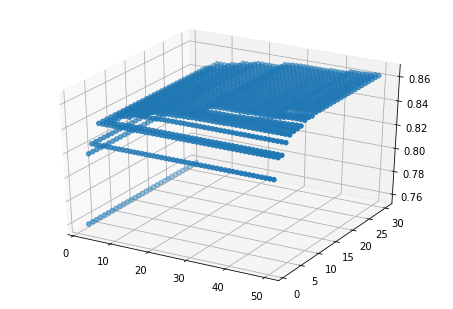

In [43]:
accuracy_list=[]
accuracy=[]
depth_list=[]
#depth_list=list(range(1,3))
leaf_num_list=[]
for i in range(1,31):
    for j in range (2,51):
        depth_list.append(i)
        leaf_num_list.append(j)
        accuracy.append(D_Tree(i,j) )
        accuracy_list.append((i,j,D_Tree(i,j)))

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(leaf_num_list,depth_list,accuracy)
plt.show()

# Find the optimal depth and leaves

In [44]:
from operator import itemgetter
sorted_accuracy=sorted(accuracy_list,key=itemgetter(2),reverse=True)
print "the optimal depth is:",sorted_accuracy[0][0],"the optimal #of leaves is:",sorted_accuracy[0][1], "with the accuracy:",sorted_accuracy[0][2]

the optimal depth is: 12 the optimal #of leaves is: 49 with the accuracy: 0.862223587224


# Test data transformation

In [51]:
bDummies = pd.get_dummies(test_data.b, prefix='b').iloc[:, 1:]
dDummies = pd.get_dummies(test_data.d, prefix='d').iloc[:, 1:]
fDummies = pd.get_dummies(test_data.f, prefix='f').iloc[:, 1:]
gDummies = pd.get_dummies(test_data.g, prefix='g').iloc[:, 1:]
hDummies = pd.get_dummies(test_data.g, prefix='h').iloc[:, 1:]
iDummies = pd.get_dummies(test_data.g, prefix='i').iloc[:, 1:]
jDummies = pd.get_dummies(test_data.g, prefix='j').iloc[:, 1:]
nDummies = pd.get_dummies(test_data.g, prefix='n').iloc[:, 1:]

testDF = pd.concat([test_data, bDummies,dDummies,fDummies,gDummies,hDummies,iDummies,jDummies,nDummies], axis=1)
y = testDF.o
testx = testDF.drop(testDF.columns[[1,3,5,6,7,8,9,13,14]], axis=1)

testy=[]
for i in y:
    if i=='<=50K.\n':
        testy.append(0)
    else:
        testy.append(1)

# Accuracy on test data

In [53]:
clf = tree.DecisionTreeClassifier(max_depth=12,max_leaf_nodes=49)
clf.fit(trainx, trainy)
testyHat = clf.predict(testx)
err=0
for i in range(len(testyHat)):
        if testyHat[i]!=testy[i]:
            err+=1
print "the accuracy is:",float ((len(testy)-float(err))/len(testy))
print "test", metrics.classification_report(testy, testyHat)


the accuracy is: 0.861249309011
test              precision    recall  f1-score   support

          0       0.89      0.94      0.91     12435
          1       0.76      0.61      0.67      3846

avg / total       0.86      0.86      0.86     16281



# Plot the tree

In [133]:
from sklearn.tree import export_graphviz
tree.export_graphviz(clf, out_file='tree.dot',max_depth=3) 